In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Lectura de datos

In [2]:
df = pd.read_csv('train.csv')
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


# Datos faltantes

1.- Ver y explorar las columnas que tienen datos faltantes

In [3]:
#Vamos a dejar hecha una funcion
def describir_datos_faltantes(df):
    #Revisamos cuales son las columnas que tienen datos faltantes
    columnas = df.columns[df.isna().any()]
    datos_faltantes = df[columnas].isna().sum().sort_values(ascending=False)
    if len(datos_faltantes) > 0:
        print('Hay',len(datos_faltantes), 'columnas con datos faltantes')
        #Hacemos un histograma de los datos faltantes en cada columna
        datos_faltantes.plot.bar(x=datos_faltantes.index, y=(datos_faltantes/len(df.index)))
        print()
        print('Sus tipos son: ')
        print(df[datos_faltantes.index].dtypes)
        print()
        print('La proporcion de datos faltantes es: ')
        print(datos_faltantes/len(df.index))
    else:
        print("No quedan datos faltantes")

In [4]:
#Filas con datos faltantes
def filas_datos_faltantes(df):
    counter = 0
    for i in range(len(df.index)):
        if df.iloc[i].isna().any() == True:
            counter = counter + 1

    print("Hay ",counter," filas con datos faltantes")
    print("La proporcion es de", (counter/len(df))*100,"%")

Hay 19 columnas con datos faltantes

Sus tipos son: 
PoolQC           object
MiscFeature      object
Alley            object
Fence            object
FireplaceQu      object
LotFrontage     float64
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
BsmtExposure     object
BsmtFinType2     object
BsmtFinType1     object
BsmtCond         object
BsmtQual         object
MasVnrArea      float64
MasVnrType       object
Electrical       object
dtype: object

La proporcion de datos faltantes es: 
PoolQC          0.995205
MiscFeature     0.963014
Alley           0.937671
Fence           0.807534
FireplaceQu     0.472603
LotFrontage     0.177397
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtFinType1    0.025342
BsmtCond        0.025342
BsmtQual        0.025342
MasVnrArea      0.005479
MasVnrType   

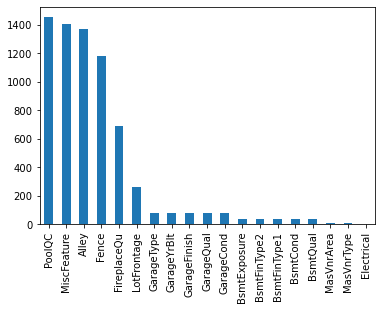

In [5]:
describir_datos_faltantes(df)

In [6]:
filas_datos_faltantes(df)

Hay  1460  filas con datos faltantes
La proporcion es de 100.0 %


Vemos que todas las filas tienen datos faltantes. Tambien vemos que las variables (columnas) con más datos faltantes son:
- PoolQC
- MiscFeature
- Alley
- Fence

Estas variables tienen mas del 50% de sus datos faltantes. Por lo que se eliminarán

In [7]:
def borrar_datos_faltantes(df, porcentaje):
    #contamos los datos faltantes. Creamos un dataframe para revisar que variables tienen mas datos faltantes.
    #Luego filtramos por las variables que tienen mas del porcentaje indicado de datos faltantes
    missing_data = df.isna().sum().sort_values(ascending=False)
    missing_data = missing_data.reset_index(name='datos_faltantes')
    missing_data['datos_faltantes'] = missing_data['datos_faltantes']/len(df.index)
    missing_data = missing_data[missing_data['datos_faltantes'] >= porcentaje]
    df = df.drop(list(missing_data['index']), axis=1)
    print("Columnas eliminadas: ")
    print(missing_data['index'])
    return df

In [8]:
df = borrar_datos_faltantes(df, 0.5)

Columnas eliminadas: 
0         PoolQC
1    MiscFeature
2          Alley
3          Fence
Name: index, dtype: object


 Revisamos las variables FireplaceQu y LotFrontage por separado

<AxesSubplot:>

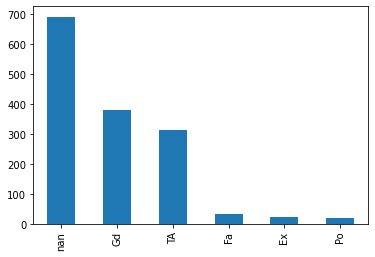

In [9]:
#Empezamos con la variable categorica FireplaceQu
df['FireplaceQu'].value_counts(dropna=False)
df['FireplaceQu'].value_counts(dropna=False).plot.bar(
    x=df['FireplaceQu'].value_counts(dropna=False).index, 
    y=df['FireplaceQu'].value_counts(dropna=False))

Vemos que los datos no faltates se divides entre Gd (Good) y TA (Average)
Primero, vamos a cambiar el NaN cuyo valor es "No Fireplace" a None

In [10]:
df['FireplaceQu'] = df['FireplaceQu'].fillna('None')

Vamos a revisar los datos faltantes que quedan

Hay 14 columnas con datos faltantes

Sus tipos son: 
LotFrontage     float64
GarageType       object
GarageYrBlt     float64
GarageFinish     object
GarageQual       object
GarageCond       object
BsmtExposure     object
BsmtFinType2     object
BsmtQual         object
BsmtCond         object
BsmtFinType1     object
MasVnrType       object
MasVnrArea      float64
Electrical       object
dtype: object

La proporcion de datos faltantes es: 
LotFrontage     0.177397
GarageType      0.055479
GarageYrBlt     0.055479
GarageFinish    0.055479
GarageQual      0.055479
GarageCond      0.055479
BsmtExposure    0.026027
BsmtFinType2    0.026027
BsmtQual        0.025342
BsmtCond        0.025342
BsmtFinType1    0.025342
MasVnrType      0.005479
MasVnrArea      0.005479
Electrical      0.000685
dtype: float64


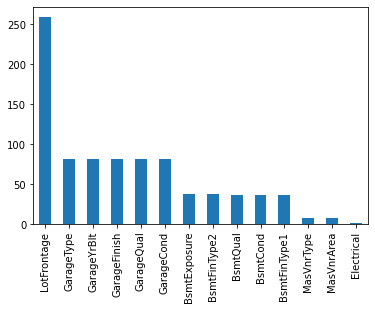

In [11]:
describir_datos_faltantes(df)

Aun quedan 14 columnas con datos faltantes. Las columnas de Garage parecen tener una relacion entre ellas.
Luego de revisarlas en la documentacion, vamos a agruparlas en una sola variable que diga si la casa tiene garage (1) o tiene garage (0)

In [12]:
df['GarageType'] = df['GarageType'].fillna('none')

In [13]:
has_garage = []
for i in df['GarageType']:
    if i == 'none':
        has_garage.append(0)
    else:
        has_garage.append(1)

In [14]:
columnas_garage = ['GarageType',
'GarageYrBlt',
'GarageFinish',
'GarageQual',
'GarageCond']

df['has_garage'] = has_garage
df = df.drop(columnas_garage, axis = 1)

Repetimos el mismo procedimiento el garage con el basement

In [15]:
df['BsmtQual'] = df['BsmtQual'].fillna('none')

In [16]:
has_basement = []
for i in df['BsmtQual']:
    if i == 'none':
        has_basement.append(0)
    else:
        has_basement.append(1)

In [17]:
columnas_basement = ['BsmtExposure',
'BsmtFinType2',
'BsmtQual',
'BsmtCond',
'BsmtFinType1']

df['has_basement'] = has_basement
df = df.drop(columnas_basement, axis = 1)

Revisamos otra vez los datos faltantes que quedan

Hay 4 columnas con datos faltantes

Sus tipos son: 
LotFrontage    float64
MasVnrType      object
MasVnrArea     float64
Electrical      object
dtype: object

La proporcion de datos faltantes es: 
LotFrontage    0.177397
MasVnrType     0.005479
MasVnrArea     0.005479
Electrical     0.000685
dtype: float64


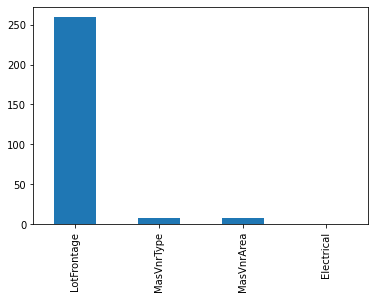

In [18]:
describir_datos_faltantes(df)

Como son tan pocos los datos faltantes, se rellenaran con la media para las numéricas y se eliminara la fila con la variable categorica faltante

In [19]:
df['MasVnrType'] = df['MasVnrType'].fillna('none')
df['MasVnrArea'] = df['MasVnrArea'].fillna(df['MasVnrArea'].mean()) 
df = df.drop(df.loc[df['Electrical'].isnull()].index)

### La variable LotFrontage sera un caso aparte (pense que seria bueno usar imputacion pero no fue necesario)

In [20]:
#Revisamos la variable numerica LotFrontage
df['LotFrontage'].describe()

count    1200.000000
mean       70.047500
std        24.294727
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

C:\Users\56986\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='LotFrontage', ylabel='Density'>

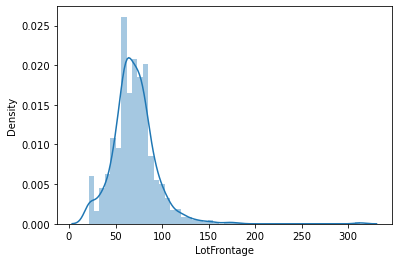

In [21]:
sns.distplot(df['LotFrontage'])

Vamos a completar los datos faltantes de esta variable con la media

In [22]:
df['LotFrontage'] = df['LotFrontage'].fillna(df['LotFrontage'].mean())

Verificamos por ultima vez los datos faltantes

In [23]:
describir_datos_faltantes(df)

No quedan datos faltantes


# Variables categoricas

Luego de revisar la documentacion del problema, vamos a separar las variables categoricas en categoricas ordinales y categoricas no ordinales.

- Variables categoricas ordinales: Son aquellas que presentan un orden lógico. Ej. nivel educacional.
- Variables categoricas no ordinales: Son aquellas que no presentan orden logico. Ej. tipo de anima.

In [24]:
df.select_dtypes(object).columns

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [25]:
categoricas_ordinales = ['LotShape', 
                         'LandContour', 
                         'Utilities', 
                         'LandSlope',
                         'ExterQual',
                         'ExterCond',
                         'HeatingQC',
                         'KitchenQual',
                         'FireplaceQu',
                         'PavedDrive'
                        ]


categoricas_no_ordinales = ['MSZoning', 
                            'Street', 
                            'LotConfig', 
                            'Neighborhood',
                            'Condition1',
                            'Condition2',
                            'BldgType',
                            'RoofStyle',
                            'RoofMatl',
                            'Exterior1st',
                            'Exterior2nd',
                            'MasVnrType',
                            'Foundation',
                            'Heating',
                            'CentralAir',
                            'Electrical',
                            'Functional',
                            'SaleType',
                            'SaleCondition'
                           ]

## Vamos a hacer una copia del dataframe original para probar con las variables categoricas transformadas

In [26]:
df_encoded = df.copy()

### Variables no ordinales

Vamos a transformar las variables categoricas no ordinales en variables binarias con un one hot encoder creado en una funcion

In [27]:
def OHE_no_ordinales(df_encoded, categoricas_no_ordinales):
    
    for categoria in categoricas_no_ordinales:
        
        #Generamos las variables binarias para el encoding
        dummies = pd.get_dummies(df_encoded[categoria])
        dummies = dummies.drop(dummies.columns[0], axis=1)
        
        #Quitamos la columna original que fue codificada
        df_encoded = df_encoded.drop(categoria, axis=1)
        
        #Concatenamos las variables binarias creadas
        df_encoded = pd.concat([df_encoded, dummies], axis=1)
        
    return df_encoded 

In [28]:
df_encoded = OHE_no_ordinales(df_encoded, categoricas_no_ordinales)

### Variables ordinales

Vamos a transformar las variables categoricas ordinales en numericas usando ordinal encoder

In [29]:
for categoria in categoricas_ordinales:
    print(df_encoded[categoria].unique())
    print()

['Reg' 'IR1' 'IR2' 'IR3']

['Lvl' 'Bnk' 'Low' 'HLS']

['AllPub' 'NoSeWa']

['Gtl' 'Mod' 'Sev']

['Gd' 'TA' 'Ex' 'Fa']

['TA' 'Gd' 'Fa' 'Po' 'Ex']

['Ex' 'Gd' 'TA' 'Fa' 'Po']

['Gd' 'TA' 'Ex' 'Fa']

['None' 'TA' 'Gd' 'Fa' 'Ex' 'Po']

['Y' 'N' 'P']



Hay que colocar las categorias en orden en una lista

In [30]:
LotShape = ['IR3', 'IR2', 'IR1', 'Reg']
LandContour = ['Low' ,'HLS', 'Bnk', 'Lvl']
Utilities = ['NoSeWa', 'AllPub']
LandSlope = ['Sev', 'Mod', 'Gtl']
ExterQual = ['Fa', 'TA', 'Gd', 'Ex']
ExterCond = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
HeatingQC = ['Po', 'Fa', 'TA', 'Gd', 'Ex']
KitchenQual = ['Fa', 'TA', 'Gd', 'Ex']
FireplaceQu = ['None', 'Po', 'Fa', 'TA', 'Gd', 'Ex']
PavedDrive = ['N', 'P', 'Y']

In [31]:
from sklearn.preprocessing import OrdinalEncoder

Se replica este codigo para cada variable categorica ordinal

In [32]:
ordi = OrdinalEncoder(categories=[LotShape])
ordi.fit(df_encoded[['LotShape']])
df_encoded['LotShape'] = ordi.transform(df_encoded[['LotShape']])

In [33]:
ordi = OrdinalEncoder(categories=[LandContour])
ordi.fit(df_encoded[['LandContour']])
df_encoded['LandContour'] = ordi.transform(df_encoded[['LandContour']])

In [34]:
ordi = OrdinalEncoder(categories=[Utilities])
ordi.fit(df_encoded[['Utilities']])
df_encoded['Utilities'] = ordi.transform(df_encoded[['Utilities']])

In [35]:
ordi = OrdinalEncoder(categories=[LandSlope])
ordi.fit(df_encoded[['LandSlope']])
df_encoded['LandSlope'] = ordi.transform(df_encoded[['LandSlope']])

In [36]:
ordi = OrdinalEncoder(categories=[ExterQual])
ordi.fit(df_encoded[['ExterQual']])
df_encoded['ExterQual'] = ordi.transform(df_encoded[['ExterQual']])

In [37]:
ordi = OrdinalEncoder(categories=[ExterCond])
ordi.fit(df_encoded[['ExterCond']])
df_encoded['ExterCond'] = ordi.transform(df_encoded[['ExterCond']])

In [38]:
ordi = OrdinalEncoder(categories=[HeatingQC])
ordi.fit(df_encoded[['HeatingQC']])
df_encoded['HeatingQC'] = ordi.transform(df_encoded[['HeatingQC']])

In [39]:
ordi = OrdinalEncoder(categories=[KitchenQual])
ordi.fit(df_encoded[['KitchenQual']])
df_encoded['KitchenQual'] = ordi.transform(df_encoded[['KitchenQual']])

In [40]:
ordi = OrdinalEncoder(categories=[FireplaceQu])
ordi.fit(df_encoded[['FireplaceQu']])
df_encoded['FireplaceQu'] = ordi.transform(df_encoded[['FireplaceQu']])

In [41]:
ordi = OrdinalEncoder(categories=[PavedDrive])
ordi.fit(df_encoded[['PavedDrive']])
df_encoded['PavedDrive'] = ordi.transform(df_encoded[['PavedDrive']])

# Correlaciones

Primero comenzamos analizando las variables numericas

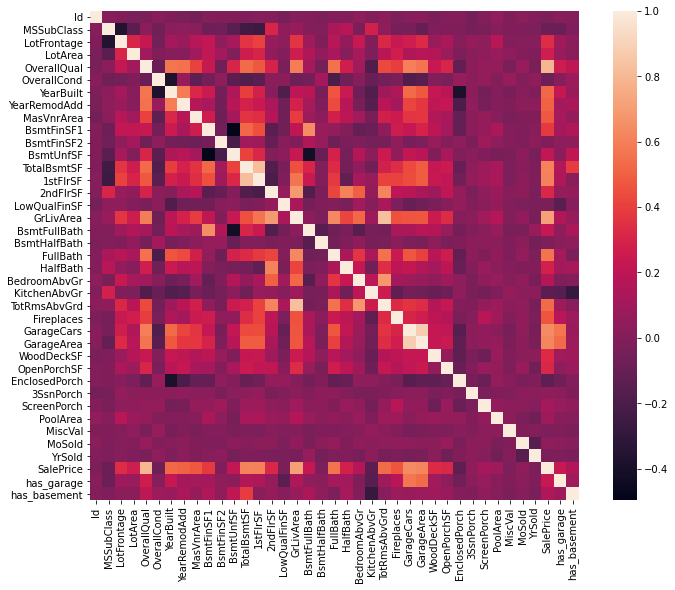

In [42]:
#Matriz de correlaciones
corrmat = df_e.corr()
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(corrmat, vmax=1, square=True);

In [54]:
#Revisamos las correlaciones de las variables con respecto a la variable dependiente
correlaciones = df_encoded.corr()['SalePrice'].sort_values(ascending=False)
correlaciones = correlaciones[correlaciones]

Vamos a hacer la prueba de revisar si hay alguna relacion entre la variable dependiente y una variavle categorica usando un boxplot

# Separamos los sets

In [45]:
#Separamos el set en X e y
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [46]:
#Separamos en train y test set
from sklearn.model_selection import train_test_split
X_train, y_train, X_test, y_test = train_test_split(X, y, test_size = 0.2)

# Regresion

In [47]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train, y_train)

ValueError: could not convert string to float: 'RL'